In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import seaborn as sns
import time
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

In [2]:
# Timing a large file load with Pandas
start_time = time.perf_counter()
df = pd.read_csv("undersampled_CIC2019_dataset.csv")
end_time = time.perf_counter()
elapsed_time_pandas = end_time - start_time
print(f"Pandas load time: {elapsed_time_pandas:.4f} seconds")

Pandas load time: 21.5466 seconds


In [3]:
# Display all column fields
pd.set_option("display.max_rows", None)

In [4]:
# View top rows (default is 5)
df.head()

,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,src2dst_duration_ms,src2dst_packets,src2dst_bytes,dst2src_duration_ms,dst2src_packets,dst2src_bytes,bidirectional_min_ps,...,udps.dns_port_count,udps.srcdst_dns_port_src_count,udps.dns_port_src_count,udps.srcdst_vul_ports_count,udps.src2dst_packet_count,udps.bidirectional_packet_count,udps.srcdst_src2dst_packet_count,udps.srcdst_bidirectional_packet_count,flowid,label
0,0,2,132,0,2,132,0,0,0,66,...,0,0,0,0,2,2,2,2,172.217.7.3-192.168.50.8-443-59416,BENIGN
1,0,2,132,0,2,132,0,0,0,66,...,0,0,0,0,4,4,2,2,172.217.11.38-192.168.50.8-443-59430,BENIGN
2,0,4,376,0,4,376,0,0,0,94,...,0,0,0,0,4,4,4,4,192.168.50.253-224.0.0.5-0-0,BENIGN
3,0,3,282,0,3,282,0,0,0,94,...,0,0,0,0,7,7,3,3,192.168.50.254-224.0.0.5-0-0,BENIGN
4,41,4,252,0,2,120,0,2,132,60,...,0,0,0,1,2,4,2,4,192.168.50.8-172.217.11.34-59406-80,BENIGN


In [5]:
# Display feature names and convention with the associated datatypes
df.dtypes

bidirectional_duration_ms                   int64
bidirectional_packets                       int64
bidirectional_bytes                         int64
src2dst_duration_ms                         int64
src2dst_packets                             int64
src2dst_bytes                               int64
dst2src_duration_ms                         int64
dst2src_packets                             int64
dst2src_bytes                               int64
bidirectional_min_ps                        int64
bidirectional_mean_ps                     float64
bidirectional_stddev_ps                   float64
bidirectional_max_ps                        int64
src2dst_min_ps                              int64
src2dst_mean_ps                           float64
src2dst_stddev_ps                         float64
src2dst_max_ps                              int64
dst2src_min_ps                              int64
dst2src_mean_ps                           float64
dst2src_stddev_ps                         float64


In [6]:
# Display number of records and features
df.shape

(4685611, 90)

In [7]:
# Check for missing values
df.isna().sum()

bidirectional_duration_ms                 0
bidirectional_packets                     0
bidirectional_bytes                       0
src2dst_duration_ms                       0
src2dst_packets                           0
src2dst_bytes                             0
dst2src_duration_ms                       0
dst2src_packets                           0
dst2src_bytes                             0
bidirectional_min_ps                      0
bidirectional_mean_ps                     0
bidirectional_stddev_ps                   0
bidirectional_max_ps                      0
src2dst_min_ps                            0
src2dst_mean_ps                           0
src2dst_stddev_ps                         0
src2dst_max_ps                            0
dst2src_min_ps                            0
dst2src_mean_ps                           0
dst2src_stddev_ps                         0
dst2src_max_ps                            0
bidirectional_min_piat_ms                 0
bidirectional_mean_piat_ms      

In [8]:
# Statistical summary of numerical data: Check for missing values, determine IQR
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bidirectional_duration_ms,4685611.0,1288.744358,10069.763049,0.0,0.000000,0.000000,13.000000,1.799914e+06
bidirectional_packets,4685611.0,15.801614,48.076272,1.0,2.000000,2.000000,6.000000,5.214400e+04
bidirectional_bytes,4685611.0,8404.543772,39417.631659,83.0,2232.000000,3028.000000,3028.000000,6.138174e+07
src2dst_duration_ms,4685611.0,1284.381835,10064.251505,0.0,0.000000,0.000000,9.000000,1.799914e+06
src2dst_packets,4685611.0,15.601013,40.244991,1.0,2.000000,2.000000,6.000000,2.044400e+04
src2dst_bytes,4685611.0,8252.675554,20279.670041,83.0,2232.000000,3028.000000,3028.000000,1.553994e+07
dst2src_duration_ms,4685611.0,283.491615,7383.756390,0.0,0.000000,0.000000,0.000000,1.799798e+06
dst2src_packets,4685611.0,0.200601,17.535089,0.0,0.000000,0.000000,0.000000,3.170000e+04
dst2src_bytes,4685611.0,151.868218,33158.270102,0.0,0.000000,0.000000,0.000000,6.014133e+07
bidirectional_min_ps,4685611.0,860.792378,524.529513,60.0,482.000000,558.000000,1514.000000,1.514000e+03


C:\Users\Aristophanies\AppData\Local\Temp\ipykernel_13096\1215900077.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[features], vert=False, labels=features)


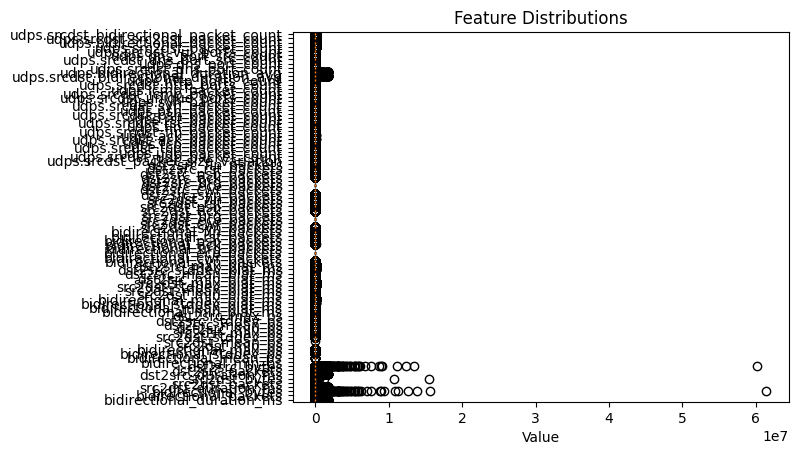

In [8]:
features = df.select_dtypes(include="number").columns

plt.figure()
plt.boxplot(df[features], vert=False, labels=features)
plt.xlabel("Value")
plt.title("Feature Distributions")
plt.show()

In [10]:
# Raw attack count values
df["label"].value_counts()

label
TFTP             950295
DrDoS_NTP        917607
DrDoS_DNS        893762
DrDoS_SNMP       415000
DrDoS_LDAP       290000
LDAP             290000
MSSQL            190000
UDP              150000
DrDoS_MSSQL      150000
DrDoS_SSDP       106650
DrDoS_UDP        105000
DrDoS_NetBIOS     65000
NetBIOS           55057
BENIGN            53277
Syn               42004
Portmap            5608
UDP-lag            5000
UDPLag             1203
WebDDoS             148
Name: count, dtype: int64

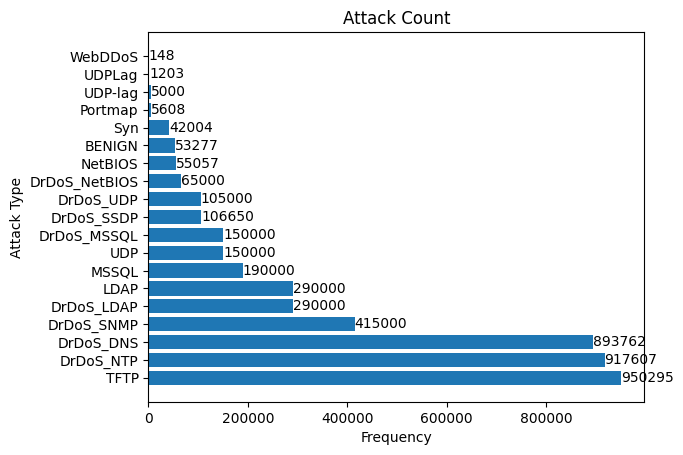

In [11]:
# Display bar plot of raw attack counts
counts = df["label"].value_counts()
fig, ax = plt.subplots()
bars = ax.barh(counts.index.astype(str), counts.values)
ax.bar_label(bars)
ax.set_xlabel("Frequency")
ax.set_ylabel("Attack Type")
ax.set_title("Attack Count")
plt.show()

In [12]:
# Normalize label counts
df["label"].value_counts(normalize=True) * 100

label
TFTP             20.281133
DrDoS_NTP        19.583508
DrDoS_DNS        19.074609
DrDoS_SNMP        8.856903
DrDoS_LDAP        6.189161
LDAP              6.189161
MSSQL             4.054967
UDP               3.201290
DrDoS_MSSQL       3.201290
DrDoS_SSDP        2.276117
DrDoS_UDP         2.240903
DrDoS_NetBIOS     1.387226
NetBIOS           1.175023
BENIGN            1.137034
Syn               0.896447
Portmap           0.119686
UDP-lag           0.106710
UDPLag            0.025674
WebDDoS           0.003159
Name: proportion, dtype: float64

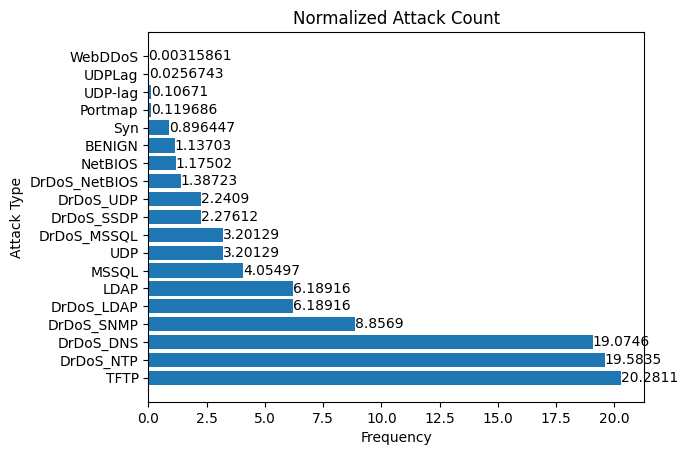

In [13]:
# Display normalized bar plot of attack counts 
ncounts = df["label"].value_counts(normalize=True) * 100
fig, ax = plt.subplots()
bars = ax.barh(ncounts.index.astype(str), ncounts.values)
ax.bar_label(bars)
ax.set_xlabel("Frequency")
ax.set_ylabel("Attack Type")
ax.set_title("Normalized Attack Count")
plt.show()

In [8]:
# Create binary classifier
df["binary_label"] = np.where(df["label"] == "BENIGN", "legitimate", "abnormal")
df["binary_label"].value_counts()

binary_label
abnormal      4632334
legitimate      53277
Name: count, dtype: int64

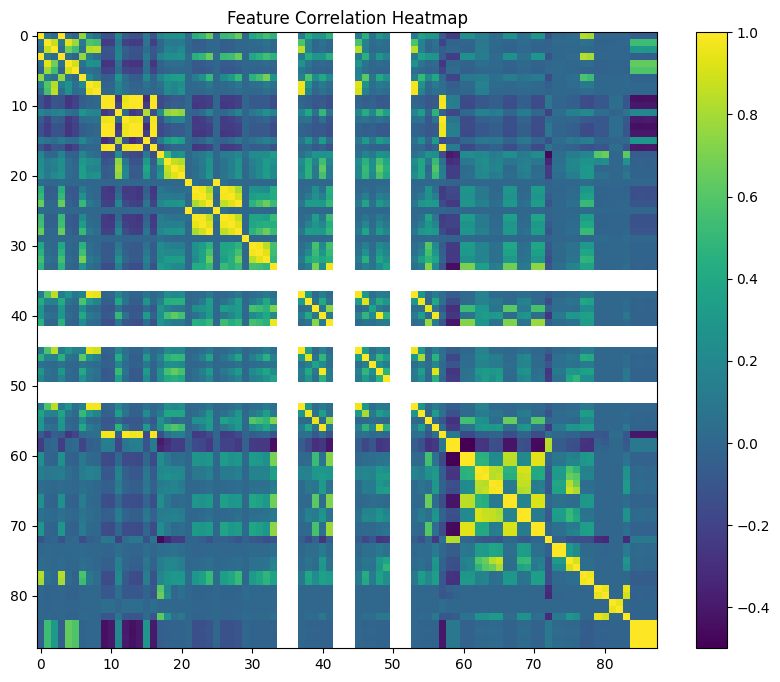

In [15]:
# Display correlation matrix to visualize highly correlated values
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Find highly correlated pairs, default method is Pearson (Linear)
corr_matrix = df.corr(numeric_only=True)  
threshold = 0.9
# Keep upper triangle only
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find pairs above threshold
high_corr = (
    upper.stack()
    .reset_index()
    .rename(columns={"level_0": "Variable 1", "level_1": "Variable 2", 0: "Correlation"})
)

high_corr = high_corr[high_corr["Correlation"].abs() >= threshold]
high_corr.sort_values(by="Correlation", ascending=False)

,Variable 1,Variable 2,Correlation
2976,udps.srcdst_icmp_packet_count,udps.icmp_packet_count,1.000000
1431,bidirectional_min_piat_ms,src2dst_min_piat_ms,1.000000
669,bidirectional_min_ps,src2dst_min_ps,0.999996
3076,udps.src2dst_packet_count,udps.srcdst_src2dst_packet_count,0.999988
2850,udps.srcdst_rst_packet_count,udps.rst_packet_count,0.999981
3079,udps.bidirectional_packet_count,udps.srcdst_bidirectional_packet_count,0.999951
3080,udps.srcdst_src2dst_packet_count,udps.srcdst_bidirectional_packet_count,0.999823
3077,udps.src2dst_packet_count,udps.srcdst_bidirectional_packet_count,0.999822
3075,udps.src2dst_packet_count,udps.bidirectional_packet_count,0.999797
3078,udps.bidirectional_packet_count,udps.srcdst_src2dst_packet_count,0.999751
